### Prediction of pollution in the city center of Barcelona (Eixample)
***
This repository belongs to the final project of the Data Science course at IT Academy (Barcelona Activa). The main objective of the project is to predict the future pollution in the city center of Barcelona if no environmental measures or policies are implemented. To achieve this, knowledge in data analysis and data science acquired during the course has been applied.

**Data cleaning**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('cont_bcn_eixample_18_23.csv')

df

,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,codi_comarca,nom_comarca,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column
0,8019043,Barcelona (Eixample),2023-12-20T00:00:00.000,8,NO2,µg/m3,traffic,urban,8019,Barcelona,13,Barcelonès,17.0,18.0,45.0,19.0,26.0,30.0,28.0,34.0,41.0,30.0,52.0,48.0,47.0,38.0,47.0,62.0,41.0,73.0,79.0,87.0,71.0,75.0,75.0,63.0,26,41.385315,2.1538,NaN
1,8019043,Barcelona (Eixample),2023-12-20T00:00:00.000,9,PM2.5,µg/m3,traffic,urban,8019,Barcelona,13,Barcelonès,14.0,15.0,17.0,16.0,19.0,20.0,20.0,20.0,17.0,17.0,20.0,20.0,21.0,16.0,17.0,22.0,15.0,25.0,24.0,27.0,22.0,29.0,35.0,24.0,26,41.385315,2.1538,NaN
2,8019043,Barcelona (Eixample),2023-12-20T00:00:00.000,10,PM10,µg/m3,traffic,urban,8019,Barcelona,13,Barcelonès,26.0,30.0,23.0,23.0,27.0,28.0,26.0,30.0,33.0,33.0,48.0,51.0,63.0,42.0,64.0,54.0,38.0,86.0,69.0,76.0,49.0,61.0,70.0,42.0,26,41.385315,2.1538,NaN
3,8019043,Barcelona (Eixample),2023-12-20T00:00:00.000,6,CO,mg/m3,traffic,urban,8019,Barcelona,13,Barcelonès,0.2,0.2,0.3,0.2,0.2,0.3,0.3,0.3,0.5,0.4,0.6,0.5,0.5,0.3,0.6,0.7,0.3,1.0,1.4,1.9,0.9,1.4,1.3,0.7,26,41.385315,2.1538,NaN
4,8019043,Barcelona (Eixample),2023-12-20T00:00:00.000,1,SO2,µg/m3,traffic,urban,8019,Barcelona,13,Barcelonès,7.0,6.0,7.0,6.0,7.0,7.0,7.0,7.0,5.0,6.0,6.0,7.0,8.0,8.0,8.0,9.0,8.0,9.0,9.0,11.0,9.0,10.0,10.0,9.0,26,41.385315,2.1538,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15450,8019043,Barcelona (Eixample),2018-01-01T00:00:00.000,6,CO,mg/m3,traffic,urban,8019,Barcelona,13,Barcelonès,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.2,26,41.385315,2.1538,POINT (2.1538 41.385315)
15451,8019043,Barcelona (Eixample),2018-01-01T00:00:00.000,12,NOX,µg/m3,traffic,urban,8019,Barcelona,13,Barcelonès,27.0,56.0,55.0,55.0,47.0,30.0,27.0,22.0,26.0,28.0,28.0,27.0,38.0,39.0,30.0,25.0,28.0,37.0,40.0,42.0,64.0,59.0,41.0,27.0,26,41.385315,2.1538,POINT (2.1538 41.385315)
15452,8019043,Barcelona (Eixample),2018-01-01T00:00:00.000,14,O3,µg/m3,traffic,urban,8019,Barcelona,13,Barcelonès,45.0,50.0,53.0,52.0,54.0,60.0,60.0,61.0,59.0,59.0,60.0,63.0,56.0,53.0,61.0,65.0,62.0,50.0,45.0,54.0,46.0,49.0,52.0,56.0,26,41.385315,2.1538,POINT (2.1538 41.385315)
15453,8019043,Barcelona (Eixample),2018-01-01T00:00:00.000,7,NO,µg/m3,traffic,urban,8019,Barcelona,13,Barcelonès,7.0,19.0,18.0,18.0,16.0,9.0,8.0,6.0,7.0,9.0,10.0,10.0,12.0,10.0,8.0,6.0,6.0,6.0,4.0,10.0,18.0,19.0,13.0,8.0,26,41.385315,2.1538,POINT (2.1538 41.385315)


Este dataset contiene registros sobre diferentes contaminantes en aire de la ciudad de Barcelona (estación de vigilancia de l'Eixample) entre el 2018 y 2023. Se ha extraido de la página web de la Generalitat de Catalunya de Dades Obertes (Open Data):

https://analisi.transparenciacatalunya.cat/en/Medi-Ambient/Qualitat-de-l-aire-als-punts-de-mesurament-manuals/qg74-87s9/about_data

En esta página web están disponibles los datos diarios de los contaminantes determinados mediante captadores manuales (actualizados trimestralmente), integrados en la Red de Vigilancia y Previsión de la Contaminación Atmosférica a partir del año 2010. Estos captadores se encuentran por toda Cataluña, en este caso se ha escogido uno situado en el centro de Barcelona (Eixample), durante el periodo de 2018 y 2023, para realizar el proyecto final, y se han descaragado los datos en un archivo csv.

Las variables presentes en el dataset son las siguientes:

- **codi_eoi**: Código oficial que asigna el Ministerio responsable de la calidad del aire formado por código provincia, código municipio y código estación.
- **nom_estacio**: Nombre de la cabina.
- **data**: Año, mes y dia de la medida.
- **magnitud**: Código numérico que identifica el contaminante.
- **contaminant**: Fórmula o mnemotécnico del contaminante.
- **unitats**: Unidades de medida del contaminante.
- **tipus_estacio**: *Traffic*: el punto de medición está ubicado en un lugar que recibe el impacto directo de las emisiones del tráfico.
- **area_urbana**: *Urban*: el punto de medición está ubicado en una área urbana (ciudad) caracterizada por la construcción continua y la existencia de infraestructura urbana, que comprende el conjunto de servicios públicos.
- **codi_ine**: Código numérico de 5 dígitos correspondiente al municipio (los dos primeros dígitos corresponden en la provincia, y los tres siguientes identifican el municipio).	
- **municipi**: Nombre del municipio donde se encuentra la cabina.
- **codi_comarca**: Código numérico correspondiente a la comarca. 	
- **nom_comarca**: Nombre de la comarca donde se encuentra el municipio.
- **h01 - h24**: Columnas con el valor mesurado para el contaminante de la estación (cada contaminante tiene sus unidades de medida). Los registros se realizan cada hora del dia(24h).
- **altitud**: Valor numérico de la altitud de la estación. Unidad: metros sobre el nivel del mar.
- **latitud**: Latitud expresada en grados decimales. Sistema de referencia WGS84.
- **longitud**: Longitud expresada en grados decimales. Sistema de referencia WGS84.	
- **geocoded_column**: Punto de georeferenciación (asignación de las coordenadas geográficas (latitud y longitud) al punto donde se encuentra la estación de vigilancia).

Seguidamente, se procede a hacer la limpieza del dataset: visualización de valores nulos, duplicados, eliminación de columnas, etc.

In [33]:
df.isnull().sum()

codi_eoi              0
nom_estacio           0
data                  0
magnitud              0
contaminant           0
unitats               0
tipus_estacio         0
area_urbana           0
codi_ine              0
municipi              0
codi_comarca          0
nom_comarca           0
h01                 411
h02                 737
h03                 460
h04                 418
h05                 419
h06                 426
h07                 430
h08                 433
h09                 460
h10                 562
h11                 873
h12                 980
h13                 979
h14                 903
h15                 777
h16                 691
h17                 469
h18                 412
h19                 384
h20                 381
h21                 387
h22                 394
h23                 392
h24                 395
altitud               0
latitud               0
longitud              0
geocoded_column    2180
dtype: int64

Voy a hacer un dataset con los valor nulos por contaminantes y horas para así visualizar si hay algún patrón o contaminante que no contiene registros.

In [36]:
# Número de nulos totales por contaminante y columna

df_null = df.groupby('contaminant')[['h01', 'h02','h03', 'h04','h05', 'h06',
                                     'h07', 'h08','h09', 'h10','h11', 'h12',
                                     'h13', 'h14','h15', 'h16','h17', 'h18',
                                     'h19', 'h20','h21', 'h22','h23', 'h24']].apply(lambda x: x.isnull().sum())

df_null

,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
contaminant,,,,,,,,,,,,,,,,,,,,,,,,
CO,32,317,34,28,30,30,30,30,33,46,84,98,105,99,79,75,32,25,22,22,22,23,24,27
NO,36,44,45,38,37,38,40,40,40,60,107,126,123,111,89,73,41,33,30,32,33,36,34,34
NO2,36,44,45,38,37,38,40,40,40,60,107,126,123,111,89,73,41,33,30,32,33,36,34,34
NOX,36,44,44,38,37,38,40,41,40,52,98,116,117,109,87,71,39,33,31,33,34,37,35,35
O3,46,53,56,49,49,51,50,52,55,62,112,125,126,106,91,84,50,45,43,42,42,42,42,45
PM10,112,116,116,114,116,117,116,116,134,146,183,189,180,171,160,144,135,123,115,109,112,109,111,108
PM2.5,110,110,111,110,110,110,110,110,110,114,116,114,115,112,112,113,113,112,110,109,109,109,109,109
SO2,3,9,9,3,3,4,4,4,8,22,66,86,90,84,70,58,18,8,3,2,2,2,3,3


In [37]:
# Suma total de nulos por contaminante

df_null.sum(axis=1)

contaminant
CO       1347
NO       1320
NO2      1320
NOX      1285
O3       1518
PM10     3152
PM2.5    2667
SO2       564
dtype: int64

Vemos que hay nulos en todos los contaminantes, todos con un número bastante uniforme menos para los PM10 y PM2.5, donde hay más cantidad. Para facilitar el visionado del dataset, elimino las columnas que no són necesarias.

In [38]:
# Eliminar las columnas que no se necesitan

df = df.drop(['codi_eoi', 'magnitud', 'tipus_estacio', 'area_urbana', 'codi_ine',
              'municipi', 'codi_comarca', 'nom_comarca', 'geocoded_column'], axis=1)

df

,nom_estacio,data,contaminant,unitats,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud
0,Barcelona (Eixample),2023-12-20T00:00:00.000,NO2,µg/m3,17.0,18.0,45.0,19.0,26.0,30.0,28.0,34.0,41.0,30.0,52.0,48.0,47.0,38.0,47.0,62.0,41.0,73.0,79.0,87.0,71.0,75.0,75.0,63.0,26,41.385315,2.1538
1,Barcelona (Eixample),2023-12-20T00:00:00.000,PM2.5,µg/m3,14.0,15.0,17.0,16.0,19.0,20.0,20.0,20.0,17.0,17.0,20.0,20.0,21.0,16.0,17.0,22.0,15.0,25.0,24.0,27.0,22.0,29.0,35.0,24.0,26,41.385315,2.1538
2,Barcelona (Eixample),2023-12-20T00:00:00.000,PM10,µg/m3,26.0,30.0,23.0,23.0,27.0,28.0,26.0,30.0,33.0,33.0,48.0,51.0,63.0,42.0,64.0,54.0,38.0,86.0,69.0,76.0,49.0,61.0,70.0,42.0,26,41.385315,2.1538
3,Barcelona (Eixample),2023-12-20T00:00:00.000,CO,mg/m3,0.2,0.2,0.3,0.2,0.2,0.3,0.3,0.3,0.5,0.4,0.6,0.5,0.5,0.3,0.6,0.7,0.3,1.0,1.4,1.9,0.9,1.4,1.3,0.7,26,41.385315,2.1538
4,Barcelona (Eixample),2023-12-20T00:00:00.000,SO2,µg/m3,7.0,6.0,7.0,6.0,7.0,7.0,7.0,7.0,5.0,6.0,6.0,7.0,8.0,8.0,8.0,9.0,8.0,9.0,9.0,11.0,9.0,10.0,10.0,9.0,26,41.385315,2.1538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15450,Barcelona (Eixample),2018-01-01T00:00:00.000,CO,mg/m3,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.2,26,41.385315,2.1538
15451,Barcelona (Eixample),2018-01-01T00:00:00.000,NOX,µg/m3,27.0,56.0,55.0,55.0,47.0,30.0,27.0,22.0,26.0,28.0,28.0,27.0,38.0,39.0,30.0,25.0,28.0,37.0,40.0,42.0,64.0,59.0,41.0,27.0,26,41.385315,2.1538
15452,Barcelona (Eixample),2018-01-01T00:00:00.000,O3,µg/m3,45.0,50.0,53.0,52.0,54.0,60.0,60.0,61.0,59.0,59.0,60.0,63.0,56.0,53.0,61.0,65.0,62.0,50.0,45.0,54.0,46.0,49.0,52.0,56.0,26,41.385315,2.1538
15453,Barcelona (Eixample),2018-01-01T00:00:00.000,NO,µg/m3,7.0,19.0,18.0,18.0,16.0,9.0,8.0,6.0,7.0,9.0,10.0,10.0,12.0,10.0,8.0,6.0,6.0,6.0,4.0,10.0,18.0,19.0,13.0,8.0,26,41.385315,2.1538


Miro los valores de los contaminantes para ver valores atípicos, nulos, etc. y decidir que hacer con ellos. Como aun hay que calcular la media de la concentración (está por horas y yo lo quiero por dia), no borro ninguno (de momento), ya que muchos de ellos quizás se vean reducidos al calcular la media.

In [39]:
# Mirar datos por contaminante (para ver valores atípicos o nulos)

df[df['contaminant'] == 'PM2.5']

,nom_estacio,data,contaminant,unitats,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud
1,Barcelona (Eixample),2023-12-20T00:00:00.000,PM2.5,µg/m3,14.0,15.0,17.0,16.0,19.0,20.0,20.0,20.0,17.0,17.0,20.0,20.0,21.0,16.0,17.0,22.0,15.0,25.0,24.0,27.0,22.0,29.0,35.0,24.0,26,41.385315,2.1538
11,Barcelona (Eixample),2023-12-19T00:00:00.000,PM2.5,µg/m3,33.0,30.0,30.0,27.0,25.0,23.0,22.0,29.0,32.0,37.0,21.0,26.0,11.0,8.0,17.0,23.0,27.0,24.0,24.0,14.0,11.0,13.0,16.0,16.0,26,41.385315,2.1538
14,Barcelona (Eixample),2023-12-18T00:00:00.000,PM2.5,µg/m3,17.0,17.0,17.0,17.0,17.0,14.0,15.0,20.0,22.0,28.0,33.0,31.0,33.0,30.0,19.0,19.0,15.0,19.0,23.0,28.0,32.0,44.0,43.0,34.0,26,41.385315,2.1538
25,Barcelona (Eixample),2023-12-17T00:00:00.000,PM2.5,µg/m3,19.0,18.0,13.0,19.0,12.0,11.0,15.0,18.0,18.0,18.0,19.0,14.0,17.0,13.0,14.0,11.0,9.0,9.0,11.0,15.0,17.0,17.0,18.0,18.0,26,41.385315,2.1538
29,Barcelona (Eixample),2023-12-16T00:00:00.000,PM2.5,µg/m3,13.0,12.0,12.0,8.0,4.0,2.0,2.0,3.0,4.0,7.0,13.0,10.0,10.0,12.0,14.0,13.0,8.0,8.0,9.0,13.0,17.0,22.0,16.0,19.0,26,41.385315,2.1538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,Barcelona (Eixample),2023-01-04T00:00:00.000,PM2.5,µg/m3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,41.385315,2.1538
2666,Barcelona (Eixample),2023-01-03T00:00:00.000,PM2.5,µg/m3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,41.385315,2.1538
2674,Barcelona (Eixample),2023-01-02T00:00:00.000,PM2.5,µg/m3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,41.385315,2.1538
2676,Barcelona (Eixample),2023-01-01T00:00:00.000,PM2.5,µg/m3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,41.385315,2.1538


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15455 entries, 0 to 15454
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nom_estacio  15455 non-null  object 
 1   data         15455 non-null  object 
 2   contaminant  15455 non-null  object 
 3   unitats      15455 non-null  object 
 4   h01          15044 non-null  float64
 5   h02          14718 non-null  float64
 6   h03          14995 non-null  float64
 7   h04          15037 non-null  float64
 8   h05          15036 non-null  float64
 9   h06          15029 non-null  float64
 10  h07          15025 non-null  float64
 11  h08          15022 non-null  float64
 12  h09          14995 non-null  float64
 13  h10          14893 non-null  float64
 14  h11          14582 non-null  float64
 15  h12          14475 non-null  float64
 16  h13          14476 non-null  float64
 17  h14          14552 non-null  float64
 18  h15          14678 non-null  float64
 19  h16 

Calculo la media de la concentración de cada contaminante a partir de las horas dal dia para saber la media diaria. Creo una columna con este nuevo dato y borro las columnas por horas.

In [41]:
# Calcular la media de la concentración de contaminantes por dia

df['mean'] = df.loc[:, 'h01':'h24'].mean(axis=1, skipna=True).round(2)

df

,nom_estacio,data,contaminant,unitats,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,mean
0,Barcelona (Eixample),2023-12-20T00:00:00.000,NO2,µg/m3,17.0,18.0,45.0,19.0,26.0,30.0,28.0,34.0,41.0,30.0,52.0,48.0,47.0,38.0,47.0,62.0,41.0,73.0,79.0,87.0,71.0,75.0,75.0,63.0,26,41.385315,2.1538,47.75
1,Barcelona (Eixample),2023-12-20T00:00:00.000,PM2.5,µg/m3,14.0,15.0,17.0,16.0,19.0,20.0,20.0,20.0,17.0,17.0,20.0,20.0,21.0,16.0,17.0,22.0,15.0,25.0,24.0,27.0,22.0,29.0,35.0,24.0,26,41.385315,2.1538,20.50
2,Barcelona (Eixample),2023-12-20T00:00:00.000,PM10,µg/m3,26.0,30.0,23.0,23.0,27.0,28.0,26.0,30.0,33.0,33.0,48.0,51.0,63.0,42.0,64.0,54.0,38.0,86.0,69.0,76.0,49.0,61.0,70.0,42.0,26,41.385315,2.1538,45.50
3,Barcelona (Eixample),2023-12-20T00:00:00.000,CO,mg/m3,0.2,0.2,0.3,0.2,0.2,0.3,0.3,0.3,0.5,0.4,0.6,0.5,0.5,0.3,0.6,0.7,0.3,1.0,1.4,1.9,0.9,1.4,1.3,0.7,26,41.385315,2.1538,0.62
4,Barcelona (Eixample),2023-12-20T00:00:00.000,SO2,µg/m3,7.0,6.0,7.0,6.0,7.0,7.0,7.0,7.0,5.0,6.0,6.0,7.0,8.0,8.0,8.0,9.0,8.0,9.0,9.0,11.0,9.0,10.0,10.0,9.0,26,41.385315,2.1538,7.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15450,Barcelona (Eixample),2018-01-01T00:00:00.000,CO,mg/m3,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.2,26,41.385315,2.1538,0.21
15451,Barcelona (Eixample),2018-01-01T00:00:00.000,NOX,µg/m3,27.0,56.0,55.0,55.0,47.0,30.0,27.0,22.0,26.0,28.0,28.0,27.0,38.0,39.0,30.0,25.0,28.0,37.0,40.0,42.0,64.0,59.0,41.0,27.0,26,41.385315,2.1538,37.42
15452,Barcelona (Eixample),2018-01-01T00:00:00.000,O3,µg/m3,45.0,50.0,53.0,52.0,54.0,60.0,60.0,61.0,59.0,59.0,60.0,63.0,56.0,53.0,61.0,65.0,62.0,50.0,45.0,54.0,46.0,49.0,52.0,56.0,26,41.385315,2.1538,55.21
15453,Barcelona (Eixample),2018-01-01T00:00:00.000,NO,µg/m3,7.0,19.0,18.0,18.0,16.0,9.0,8.0,6.0,7.0,9.0,10.0,10.0,12.0,10.0,8.0,6.0,6.0,6.0,4.0,10.0,18.0,19.0,13.0,8.0,26,41.385315,2.1538,10.71


In [42]:
# Borrar columnas por horas y ordenar las demás

horas = [
    'h01', 'h02', 'h03', 'h04', 'h05', 'h06',
    'h07', 'h08', 'h09', 'h10', 'h11', 'h12',
    'h13', 'h14', 'h15', 'h16', 'h17', 'h18',
    'h19', 'h20', 'h21', 'h22', 'h23', 'h24'
]

df = df.drop(columns=horas)

df = df[['nom_estacio', 'data', 'contaminant', 'unitats', 'mean', 'altitud', 'latitud', 'longitud']]

df

,nom_estacio,data,contaminant,unitats,mean,altitud,latitud,longitud
0,Barcelona (Eixample),2023-12-20T00:00:00.000,NO2,µg/m3,47.75,26,41.385315,2.1538
1,Barcelona (Eixample),2023-12-20T00:00:00.000,PM2.5,µg/m3,20.50,26,41.385315,2.1538
2,Barcelona (Eixample),2023-12-20T00:00:00.000,PM10,µg/m3,45.50,26,41.385315,2.1538
3,Barcelona (Eixample),2023-12-20T00:00:00.000,CO,mg/m3,0.62,26,41.385315,2.1538
4,Barcelona (Eixample),2023-12-20T00:00:00.000,SO2,µg/m3,7.75,26,41.385315,2.1538
...,...,...,...,...,...,...,...,...
15450,Barcelona (Eixample),2018-01-01T00:00:00.000,CO,mg/m3,0.21,26,41.385315,2.1538
15451,Barcelona (Eixample),2018-01-01T00:00:00.000,NOX,µg/m3,37.42,26,41.385315,2.1538
15452,Barcelona (Eixample),2018-01-01T00:00:00.000,O3,µg/m3,55.21,26,41.385315,2.1538
15453,Barcelona (Eixample),2018-01-01T00:00:00.000,NO,µg/m3,10.71,26,41.385315,2.1538


Como era de esperar, al hacer la media de cada dia se han reducido los valores nulos. Procedo a borrar los restantes que quedan.

In [43]:
df.isnull().sum()

nom_estacio      0
data             0
contaminant      0
unitats          0
mean           304
altitud          0
latitud          0
longitud         0
dtype: int64

In [44]:
df = df.dropna()

df.isnull().sum()

nom_estacio    0
data           0
contaminant    0
unitats        0
mean           0
altitud        0
latitud        0
longitud       0
dtype: int64

Seguidamente, separo la columna 'data' en tres columnas (año, mes y dia) y creo una nueva columna donde se incluya la estación del año (invierno, primavera, verano y otoño) segun el mes.

In [45]:
# Separar la data en varias columnas (año, mes y dia)

df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%dT%H:%M:%S.%f')

df['year'] = df['data'].dt.year
df['month'] = df['data'].dt.month
df['day'] = df['data'].dt.day

df

C:\Users\Paula\AppData\Local\Temp\ipykernel_31576\1237414656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%dT%H:%M:%S.%f')
C:\Users\Paula\AppData\Local\Temp\ipykernel_31576\1237414656.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['data'].dt.year
C:\Users\Paula\AppData\Local\Temp\ipykernel_31576\1237414656.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,nom_estacio,data,contaminant,unitats,mean,altitud,latitud,longitud,year,month,day
0,Barcelona (Eixample),2023-12-20,NO2,µg/m3,47.75,26,41.385315,2.1538,2023,12,20
1,Barcelona (Eixample),2023-12-20,PM2.5,µg/m3,20.50,26,41.385315,2.1538,2023,12,20
2,Barcelona (Eixample),2023-12-20,PM10,µg/m3,45.50,26,41.385315,2.1538,2023,12,20
3,Barcelona (Eixample),2023-12-20,CO,mg/m3,0.62,26,41.385315,2.1538,2023,12,20
4,Barcelona (Eixample),2023-12-20,SO2,µg/m3,7.75,26,41.385315,2.1538,2023,12,20
...,...,...,...,...,...,...,...,...,...,...,...
15450,Barcelona (Eixample),2018-01-01,CO,mg/m3,0.21,26,41.385315,2.1538,2018,1,1
15451,Barcelona (Eixample),2018-01-01,NOX,µg/m3,37.42,26,41.385315,2.1538,2018,1,1
15452,Barcelona (Eixample),2018-01-01,O3,µg/m3,55.21,26,41.385315,2.1538,2018,1,1
15453,Barcelona (Eixample),2018-01-01,NO,µg/m3,10.71,26,41.385315,2.1538,2018,1,1


In [46]:
# Ordenar las columnas

df = df[['nom_estacio','contaminant', 'unitats', 'mean', 'altitud', 'latitud', 'longitud', 'data', 'year', 'month', 'day']]

df.head(7)

,nom_estacio,contaminant,unitats,mean,altitud,latitud,longitud,data,year,month,day
0,Barcelona (Eixample),NO2,µg/m3,47.75,26,41.385315,2.1538,2023-12-20,2023,12,20
1,Barcelona (Eixample),PM2.5,µg/m3,20.50,26,41.385315,2.1538,2023-12-20,2023,12,20
2,Barcelona (Eixample),PM10,µg/m3,45.50,26,41.385315,2.1538,2023-12-20,2023,12,20
3,Barcelona (Eixample),CO,mg/m3,0.62,26,41.385315,2.1538,2023-12-20,2023,12,20
4,Barcelona (Eixample),SO2,µg/m3,7.75,26,41.385315,2.1538,2023-12-20,2023,12,20
5,Barcelona (Eixample),O3,µg/m3,15.08,26,41.385315,2.1538,2023-12-20,2023,12,20
6,Barcelona (Eixample),NO,µg/m3,34.62,26,41.385315,2.1538,2023-12-20,2023,12,20


In [47]:
# Incluir columna con la estación del año

def estacion(month):
    if 1 <= month <= 3:
        return 'winter'
    elif 4 <= month <= 6:
        return 'spring'
    elif 7 <= month <= 9:
        return 'summer'
    elif 10 <= month <= 12:
        return 'autumn'
    else:
        return 'unknown'

df['season'] = df['month'].apply(estacion)

df

C:\Users\Paula\AppData\Local\Temp\ipykernel_31576\3081671732.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['month'].apply(estacion)


,nom_estacio,contaminant,unitats,mean,altitud,latitud,longitud,data,year,month,day,season
0,Barcelona (Eixample),NO2,µg/m3,47.75,26,41.385315,2.1538,2023-12-20,2023,12,20,autumn
1,Barcelona (Eixample),PM2.5,µg/m3,20.50,26,41.385315,2.1538,2023-12-20,2023,12,20,autumn
2,Barcelona (Eixample),PM10,µg/m3,45.50,26,41.385315,2.1538,2023-12-20,2023,12,20,autumn
3,Barcelona (Eixample),CO,mg/m3,0.62,26,41.385315,2.1538,2023-12-20,2023,12,20,autumn
4,Barcelona (Eixample),SO2,µg/m3,7.75,26,41.385315,2.1538,2023-12-20,2023,12,20,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...
15450,Barcelona (Eixample),CO,mg/m3,0.21,26,41.385315,2.1538,2018-01-01,2018,1,1,winter
15451,Barcelona (Eixample),NOX,µg/m3,37.42,26,41.385315,2.1538,2018-01-01,2018,1,1,winter
15452,Barcelona (Eixample),O3,µg/m3,55.21,26,41.385315,2.1538,2018-01-01,2018,1,1,winter
15453,Barcelona (Eixample),NO,µg/m3,10.71,26,41.385315,2.1538,2018-01-01,2018,1,1,winter


Paso los contaminantes que se encuentran en la columna 'contaminants' a columnas individuales para después poder hacer las predicciones.

In [48]:
# Poner los contaminantes en columnas
df = pd.pivot_table(df, 
                    values='mean',
                    columns='contaminant',
                    index=['nom_estacio', 'altitud', 'latitud', 'longitud',
                           'data', 'year', 'month', 'day', 'season']).reset_index()
df

contaminant,nom_estacio,altitud,latitud,longitud,data,year,month,day,season,CO,NO,NO2,NOX,O3,PM10,PM2.5,SO2
0,Barcelona (Eixample),26,41.385315,2.1538,2018-12-31,2018,12,31,autumn,0.69,155.25,74.79,312.00,6.00,32.67,NaN,3.33
1,Barcelona (Eixample),26,41.385315,2.1538,2019-01-01,2019,1,1,winter,0.33,161.38,68.62,315.29,14.75,36.83,NaN,3.25
2,Barcelona (Eixample),26,41.385315,2.1538,2019-01-02,2019,1,2,winter,0.48,46.25,44.35,115.10,15.25,15.83,NaN,1.50
3,Barcelona (Eixample),26,41.385315,2.1538,2019-01-03,2019,1,3,winter,0.47,38.42,50.38,108.79,8.88,20.38,NaN,1.58
4,Barcelona (Eixample),26,41.385315,2.1538,2019-01-04,2019,1,4,winter,0.72,108.67,69.75,235.92,9.08,34.71,NaN,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,Barcelona (Eixample),26,41.385315,2.1538,2018-12-26,2018,12,26,autumn,0.26,53.46,52.25,134.04,9.88,21.54,NaN,1.17
2176,Barcelona (Eixample),26,41.385315,2.1538,2018-12-27,2018,12,27,autumn,0.34,24.04,36.04,72.50,13.79,16.92,NaN,1.00
2177,Barcelona (Eixample),26,41.385315,2.1538,2018-12-28,2018,12,28,autumn,0.33,34.17,42.12,94.38,7.62,20.83,NaN,1.21
2178,Barcelona (Eixample),26,41.385315,2.1538,2018-12-29,2018,12,29,autumn,0.34,23.00,34.83,69.83,12.29,17.29,NaN,1.00


In [49]:
# Ordenar por fechas

df['data2'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values(by=['data2']).reset_index(drop=True)

df

contaminant,nom_estacio,altitud,latitud,longitud,data,year,month,day,season,CO,NO,NO2,NOX,O3,PM10,PM2.5,SO2,data2
0,Barcelona (Eixample),26,41.385315,2.1538,2018-01-01,2018,1,1,winter,0.21,10.71,21.25,37.42,55.21,16.62,NaN,1.00,2018-01-01
1,Barcelona (Eixample),26,41.385315,2.1538,2018-01-02,2018,1,2,winter,0.36,20.00,37.42,67.96,36.79,16.17,NaN,2.00,2018-01-02
2,Barcelona (Eixample),26,41.385315,2.1538,2018-01-03,2018,1,3,winter,0.34,17.58,24.04,50.96,36.62,15.67,NaN,2.04,2018-01-03
3,Barcelona (Eixample),26,41.385315,2.1538,2018-01-04,2018,1,4,winter,0.31,15.92,26.96,51.29,32.33,17.12,NaN,1.96,2018-01-04
4,Barcelona (Eixample),26,41.385315,2.1538,2018-01-05,2018,1,5,winter,0.34,21.27,43.50,75.95,25.50,12.45,NaN,1.68,2018-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,Barcelona (Eixample),26,41.385315,2.1538,2023-12-16,2023,12,16,autumn,0.37,17.54,45.58,NaN,24.33,23.25,10.46,3.38,2023-12-16
2176,Barcelona (Eixample),26,41.385315,2.1538,2023-12-17,2023,12,17,autumn,0.44,21.88,52.92,NaN,16.25,25.92,15.12,4.38,2023-12-17
2177,Barcelona (Eixample),26,41.385315,2.1538,2023-12-18,2023,12,18,autumn,1.00,94.96,83.00,NaN,4.12,55.17,24.46,8.04,2023-12-18
2178,Barcelona (Eixample),26,41.385315,2.1538,2023-12-19,2023,12,19,autumn,1.04,99.12,69.42,NaN,12.38,53.08,22.46,8.29,2023-12-19


Después de mirar los valores nulos y observar los datos en general decido eliminar los NOX y PM2.5 ya que tienen menos registros (dejaron de medir los NOX y PM2.5 no hay registros en muchos años)

In [50]:
# Eliminar los NOX (dejaron de medirlos todos juntos) y PM2.5 (hay pocos registros)

df = df.drop(['NOX', 'data2', 'PM2.5'], axis=1)

df

contaminant,nom_estacio,altitud,latitud,longitud,data,year,month,day,season,CO,NO,NO2,O3,PM10,SO2
0,Barcelona (Eixample),26,41.385315,2.1538,2018-01-01,2018,1,1,winter,0.21,10.71,21.25,55.21,16.62,1.00
1,Barcelona (Eixample),26,41.385315,2.1538,2018-01-02,2018,1,2,winter,0.36,20.00,37.42,36.79,16.17,2.00
2,Barcelona (Eixample),26,41.385315,2.1538,2018-01-03,2018,1,3,winter,0.34,17.58,24.04,36.62,15.67,2.04
3,Barcelona (Eixample),26,41.385315,2.1538,2018-01-04,2018,1,4,winter,0.31,15.92,26.96,32.33,17.12,1.96
4,Barcelona (Eixample),26,41.385315,2.1538,2018-01-05,2018,1,5,winter,0.34,21.27,43.50,25.50,12.45,1.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,Barcelona (Eixample),26,41.385315,2.1538,2023-12-16,2023,12,16,autumn,0.37,17.54,45.58,24.33,23.25,3.38
2176,Barcelona (Eixample),26,41.385315,2.1538,2023-12-17,2023,12,17,autumn,0.44,21.88,52.92,16.25,25.92,4.38
2177,Barcelona (Eixample),26,41.385315,2.1538,2023-12-18,2023,12,18,autumn,1.00,94.96,83.00,4.12,55.17,8.04
2178,Barcelona (Eixample),26,41.385315,2.1538,2023-12-19,2023,12,19,autumn,1.04,99.12,69.42,12.38,53.08,8.29


In [51]:
df.isnull().sum()

contaminant
nom_estacio     0
altitud         0
latitud         0
longitud        0
data            0
year            0
month           0
day             0
season          0
CO             17
NO             23
NO2            23
O3             28
PM10           91
SO2             1
dtype: int64

In [52]:
# Eliminar nulos

df = df.dropna()
df.isnull().sum()

contaminant
nom_estacio    0
altitud        0
latitud        0
longitud       0
data           0
year           0
month          0
day            0
season         0
CO             0
NO             0
NO2            0
O3             0
PM10           0
SO2            0
dtype: int64

#### Exploratory Data Analysis

Ya tenemos el dataset limpio, ahora voy a realizar el análisis exploratorio de datos (EDA) antes de aplicar modelos más avanzados o realizar un análisis más profundo.

El objetivo principal del EDA es entender la naturaleza de los datos, identificar patrones, tendencias, relaciones y posibles anomalías. Para ello, se pueden hacer los siguientes pasos:

- Resumen estadístico: Calcular medidas descriptivas como la media, la mediana, la desviación estándar, etc.

- Visualización de datos: Utilizar gráficos y visualizaciones para representar la distribución de los datos, identificar outliers, y entender las relaciones entre las variables.

- Manejo de datos faltantes: Identificar y abordar los valores faltantes en los datos.

- Análisis de correlación: Evaluar las relaciones entre las variables para entender cómo se relacionan entre sí.

- Transformación de datos: Aplicar transformaciones a los datos si es necesario, como la normalización o la estandarización.

- Detección de outliers: Identificar y entender la presencia de valores atípicos en los datos.

In [30]:
# Análisis estadístico

df.describe().round(2)

contaminant,altitud,latitud,longitud,year,month,day,CO,NO,NO2,O3,PM10,SO2
count,2030.0,2030.00,2030.00,2030.00,2030.00,2030.0,2030.00,2030.00,2030.00,2030.00,2030.00,2030.00
mean,26.0,41.39,2.15,2020.40,6.63,15.7,0.34,22.90,42.45,40.77,27.37,1.65
std,0.0,0.00,0.00,1.67,3.43,8.8,0.14,21.86,15.65,17.64,11.67,0.96
min,26.0,41.39,2.15,2018.00,1.00,1.0,0.00,1.42,8.50,1.00,5.08,1.00
25%,26.0,41.39,2.15,2019.00,4.00,8.0,0.24,10.21,30.76,27.58,19.50,1.00
50%,26.0,41.39,2.15,2020.00,7.00,16.0,0.31,16.54,41.13,42.21,25.75,1.25
75%,26.0,41.39,2.15,2022.00,10.00,23.0,0.40,26.11,52.33,53.29,32.83,1.96
max,26.0,41.39,2.15,2023.00,12.00,31.0,1.33,184.21,103.67,112.29,120.62,8.29


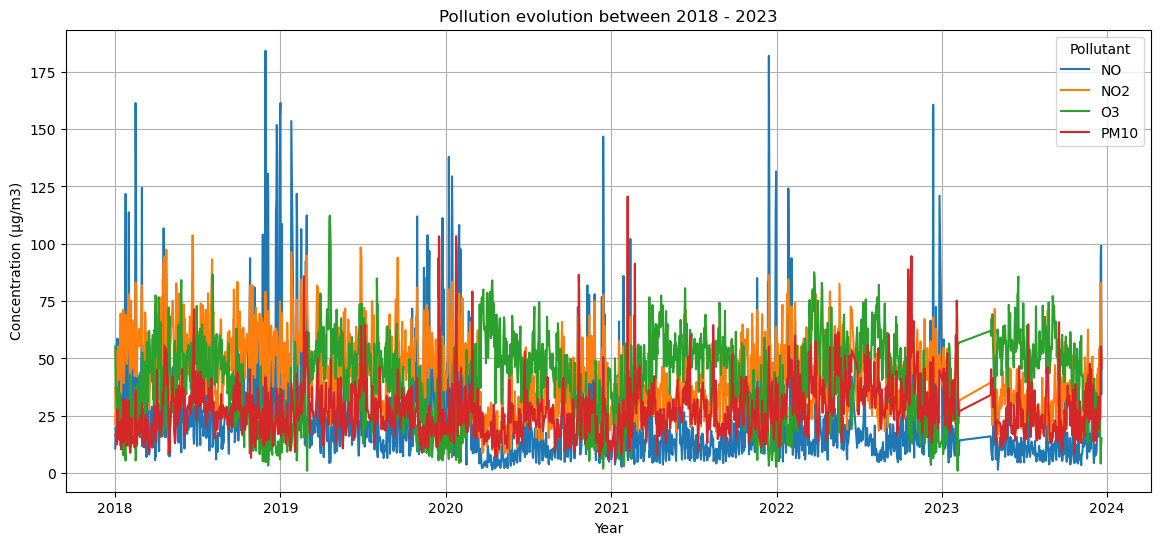

In [72]:
# Gráfico contaminantes
contaminantes = ['NO', 'NO2', 'O3', 'PM10']

plt.figure(figsize=(14, 6))
for contaminante in contaminantes:
    plt.plot(df['data'], df[contaminante], label=contaminante)
    
plt.title('Pollution evolution between 2018 - 2023')
plt.xlabel('Year')
plt.ylabel('Concentration (µg/m3)')
plt.legend(title='Pollutant')
plt.grid(True)
plt.show()


En este gráfico observamos la concentración de cuatro contaminantes diferentes a lo largo del los años. Hay un periodo donde no se reistraron datos (entre 2023 y 2024). Se puede ver el patron que tiene cada contaminante, ya que fluctuan mucho segun las condiciones (meteorologia y época del año).

- **NO**
- **NO2**
- **O3**
- **PM10**

En los siguintes gráficos veremos los contaminantes que quedan. Como tienen magnitudes y unidades diferentes, para ayudar a su visualización, los he puesto en otros gráficos.

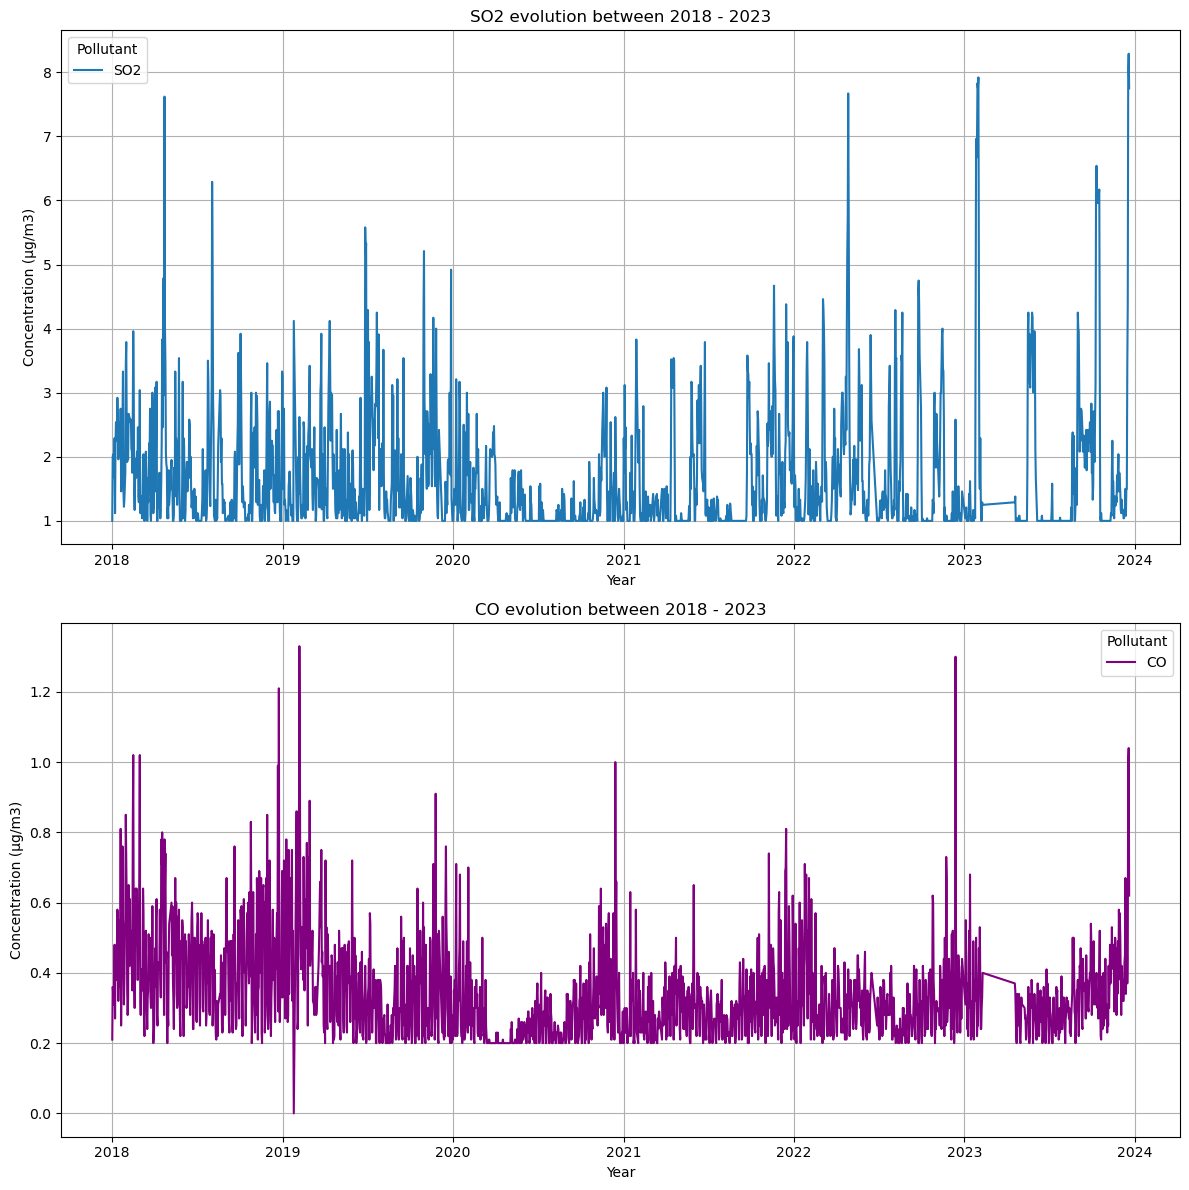

In [74]:
# Gráfico contaminantes

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

axs[0].plot(df['data'], df['SO2'], label='SO2')
axs[0].set_title('SO2 evolution between 2018 - 2023')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Concentration (µg/m3)')
axs[0].legend(title='Pollutant')
axs[0].grid(True)

axs[1].plot(df['data'], df['CO'], label='CO', color='purple')
axs[1].set_title('CO evolution between 2018 - 2023')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Concentration (µg/m3)')
axs[1].legend(title='Pollutant')
axs[1].grid(True)

plt.tight_layout()
plt.show()

En ambos gráficos se puede observar cómo durante la pandemia (a partir de 2020) la concentración CO y SO2 disminuyó, ya que había menos presencia de coches y actividad industrial y, por lo tanto, menos expulsión de estos contaminantes a la atmosfera. En el caso del CO se visualiza un dato atípico: un regístro de 0 mg/m³. Este dato es inconcluente, ya que es prácticamente imposible que se den las condiciones para que haya una nula concentración de CO. Consecuentemente, lo considero un valor nulo y procedo a borrarlo.

In [76]:
# Mirar el outlier

df[df['CO'] == 0]

contaminant,nom_estacio,altitud,latitud,longitud,data,year,month,day,season,CO,NO,NO2,O3,PM10,SO2
389,Barcelona (Eixample),26,41.385315,2.1538,2019-01-25,2019,1,25,winter,0.0,153.54,96.33,11.33,39.33,4.12


Realizo el mismo gráfico pero sin ese outlier.

In [77]:
# Eliminar el outlier (como el valor es 0 lo considero nulo, ya que no és lógico que se registrara 0 concentración de CO)

df.drop(df[df['CO'] == 0].index, inplace=True)

C:\Users\Paula\AppData\Local\Temp\ipykernel_31576\3643393529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['CO'] == 0].index, inplace=True)


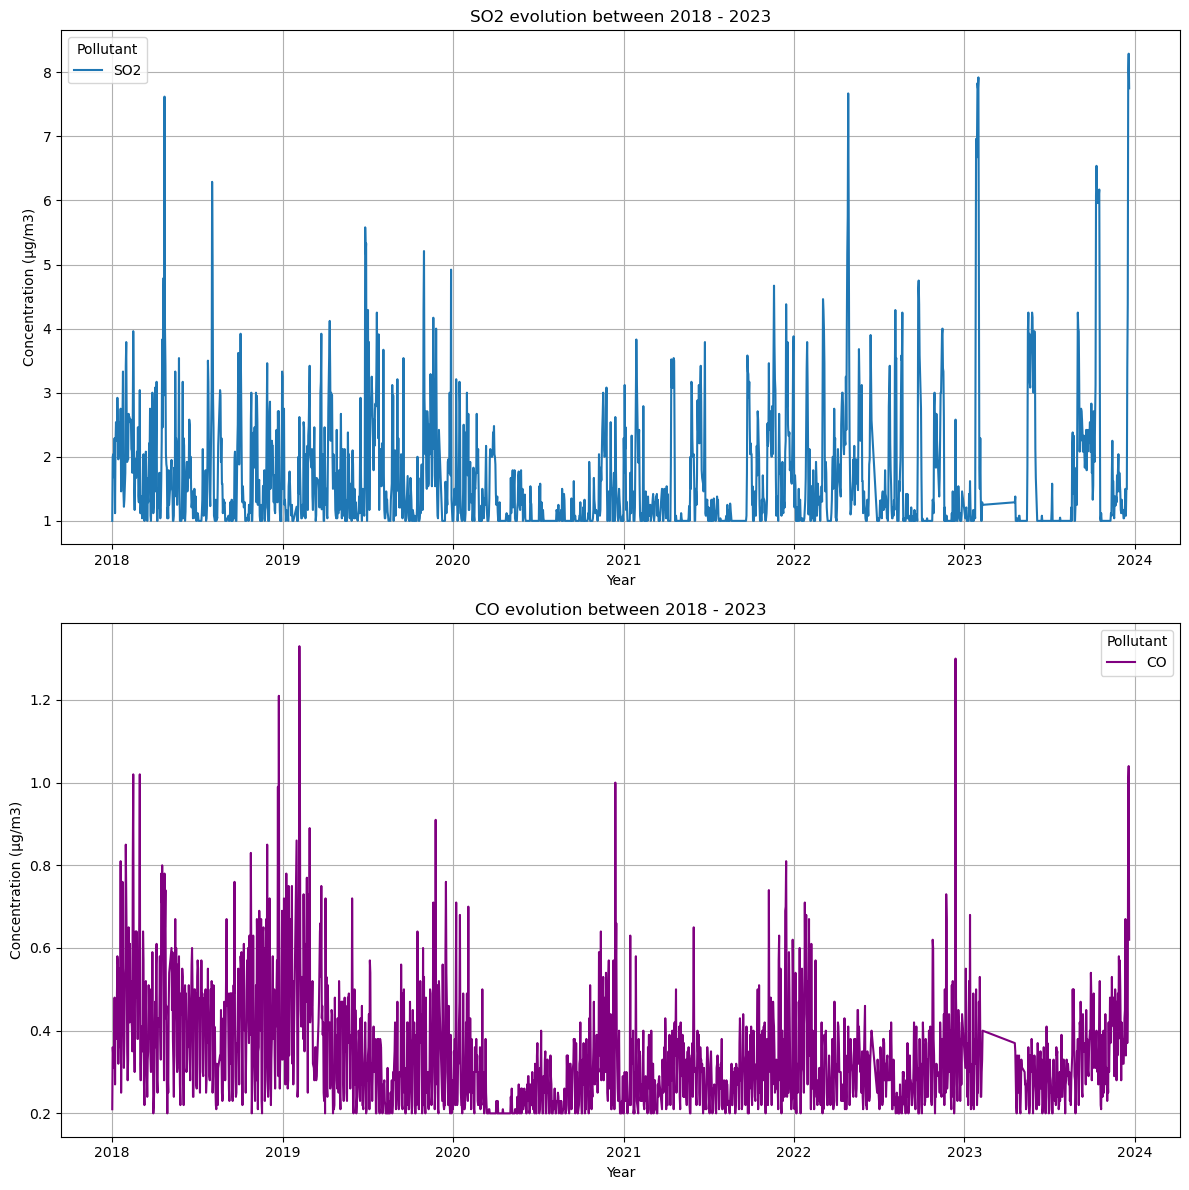

In [78]:
# Gráfico contaminantes

fig, axs = plt.subplots(2, 1, figsize=(12, 12))

axs[0].plot(df['data'], df['SO2'], label='SO2')
axs[0].set_title('SO2 evolution between 2018 - 2023')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Concentration (µg/m3)')
axs[0].legend(title='Pollutant')
axs[0].grid(True)

axs[1].plot(df['data'], df['CO'], label='CO', color='purple')
axs[1].set_title('CO evolution between 2018 - 2023')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Concentration (µg/m3)')
axs[1].legend(title='Pollutant')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Guardo el dataset limpio en un archivo csv para poder utilizarlo en un futuro.

In [109]:
# Guardar el df con los contaminantes en columnas en un archivo csv

df_archivo = "cont_bcn_eixample_18_23_clean.csv"
df.to_csv(df_archivo, index=False)

Ya hemos visto la idea principal que es la evolución de los contaminantes en el tiempo. Ahora haré un análisi visual de diferentes aspectos que puede ser interesante resaltar.

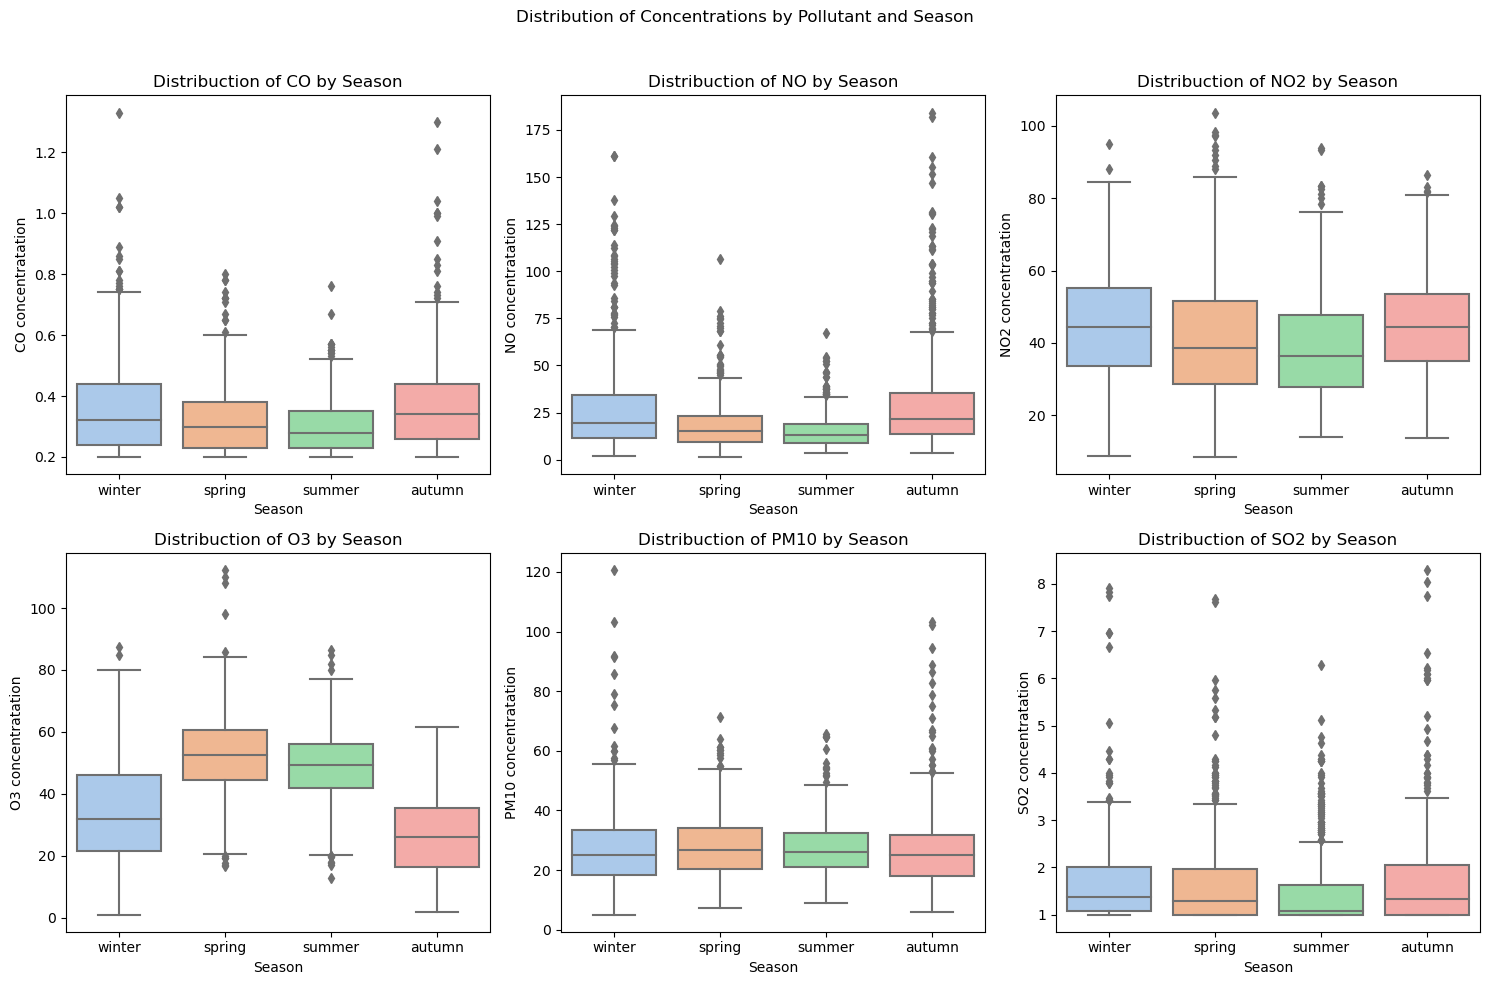

In [84]:
# Boxplot para cada estación

contaminants = ['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Distribution of Concentrations by Pollutant and Season')

for i, contaminant in enumerate(contaminants):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    
    sns.boxplot(x='season', y=contaminant, data=df, ax=ax, palette='pastel')
    ax.set_xlabel('Season')
    ax.set_ylabel(f'{contaminant} concentratation')
    ax.set_title(f'Distribuction of {contaminant} by Season')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Con estos gráficos podemos ver la distribución per estación, ya que dependiendo del contaminante, puede variar su concentración según la estación del año. 

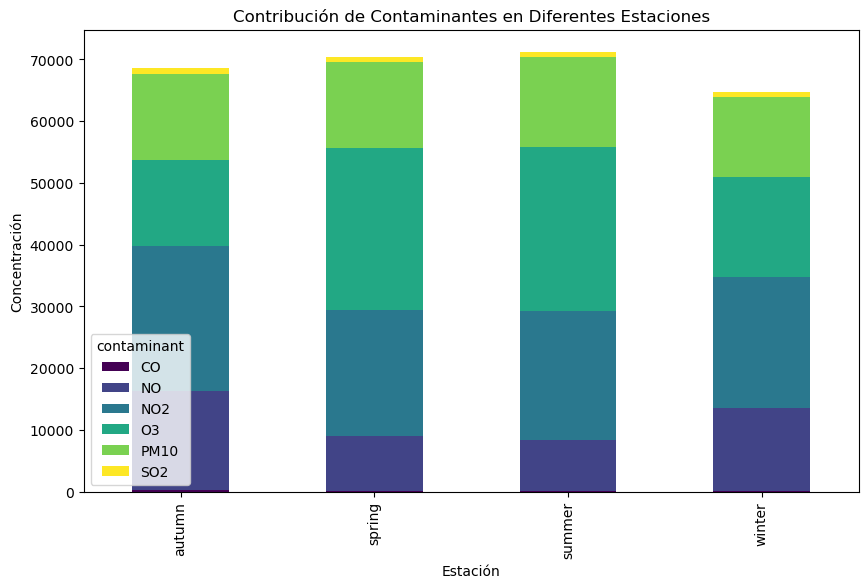

In [57]:
# Gráfico de barras apiladas para la contribución de cada contaminante en diferentes estaciones
contaminants = ['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']

# Filtrar el DataFrame solo para las columnas relevantes
data_to_plot = df[['season'] + contaminants]

# Agrupar por estación y calcular la suma de cada contaminante
grouped_data = data_to_plot.groupby('season').sum()

# Crear el gráfico de barras apiladas
stacked_bar = grouped_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

# Añadir etiquetas y título
plt.xlabel('Estación')
plt.ylabel('Concentración')
plt.title('Contribución de Contaminantes en Diferentes Estaciones')

# Mostrar el gráfico
plt.show()


C:\Users\Paula\AppData\Local\Temp\ipykernel_31576\2153829357.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_means = df.groupby('month').mean()


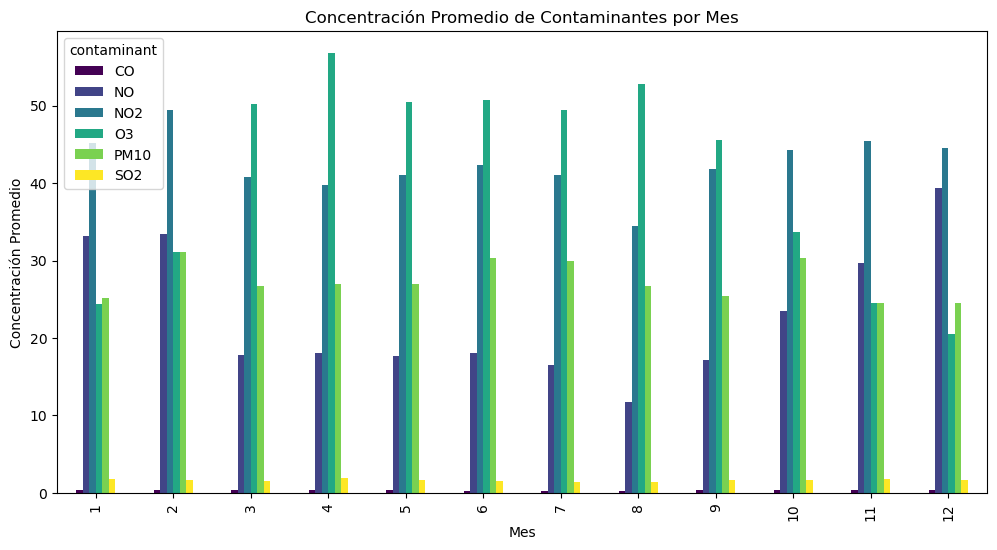

In [58]:
# Agrupar por mes y calcular la concentración promedio de cada contaminante
monthly_means = df.groupby('month').mean()

# Lista de contaminantes
contaminants = ['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']

# Seleccionar solo las columnas relevantes
monthly_means = monthly_means[contaminants]

# Crear el gráfico de barras
monthly_means.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Añadir etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Concentración Promedio')
plt.title('Concentración Promedio de Contaminantes por Mes')

# Mostrar el gráfico
plt.show()


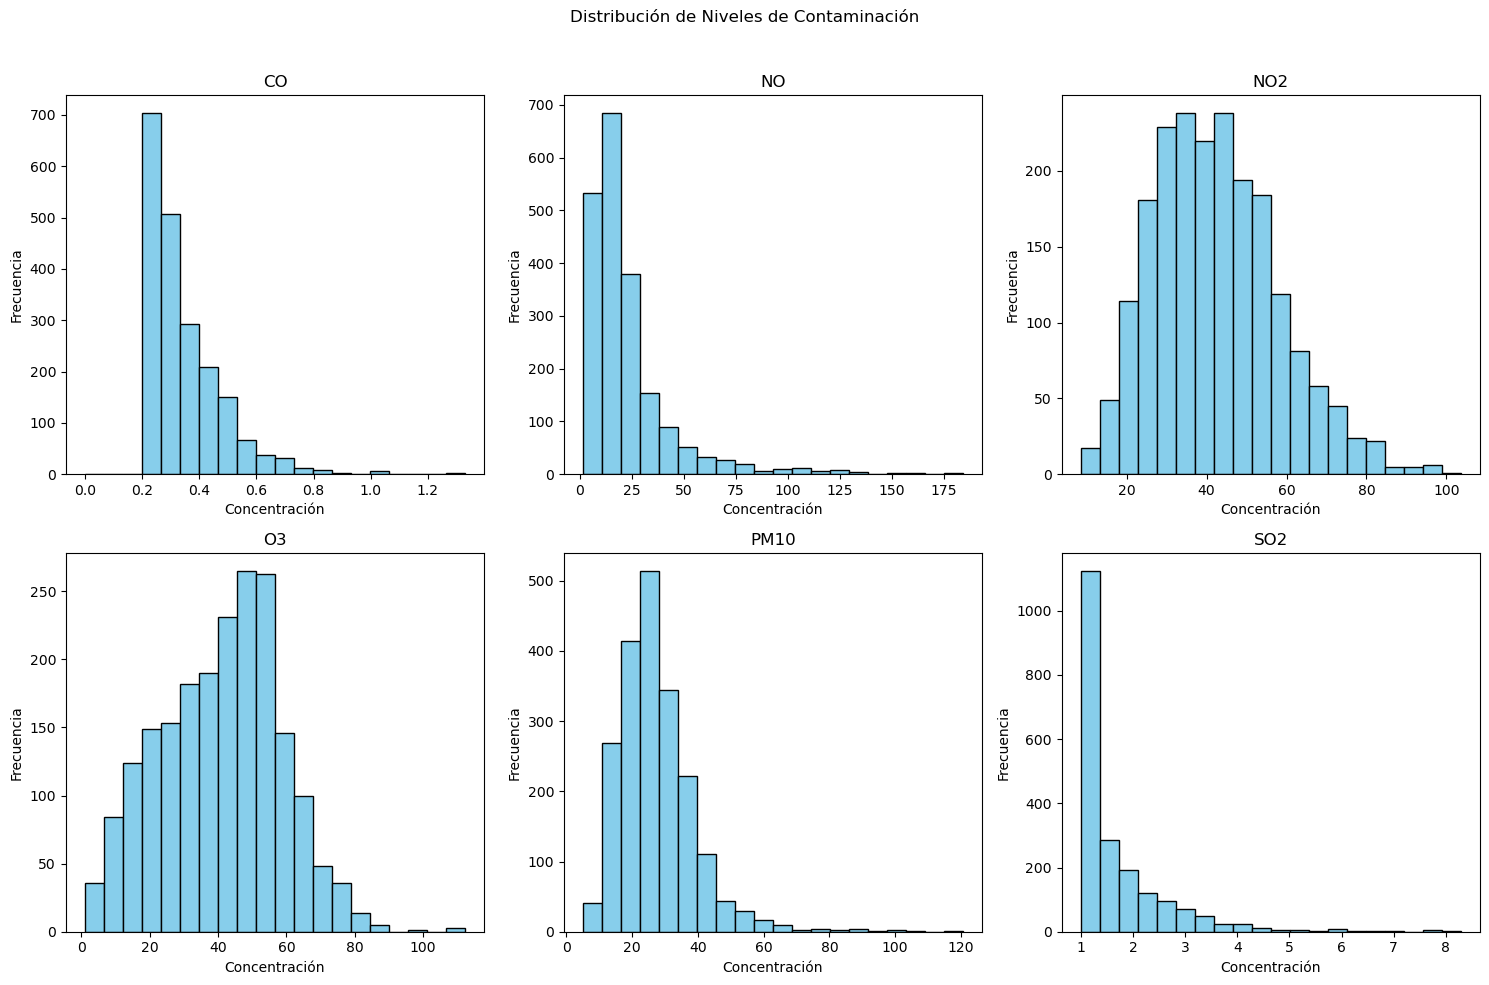

In [59]:
# Lista de contaminantes
contaminants = ['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']

# Crear subgráficos para cada contaminante
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Distribución de Niveles de Contaminación')

# Iterar sobre cada contaminante y crear un histograma
for i, contaminant in enumerate(contaminants):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    ax.hist(df[contaminant], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(contaminant)
    ax.set_xlabel('Concentración')
    ax.set_ylabel('Frecuencia')

# Ajustar el diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar el gráfico
plt.show()


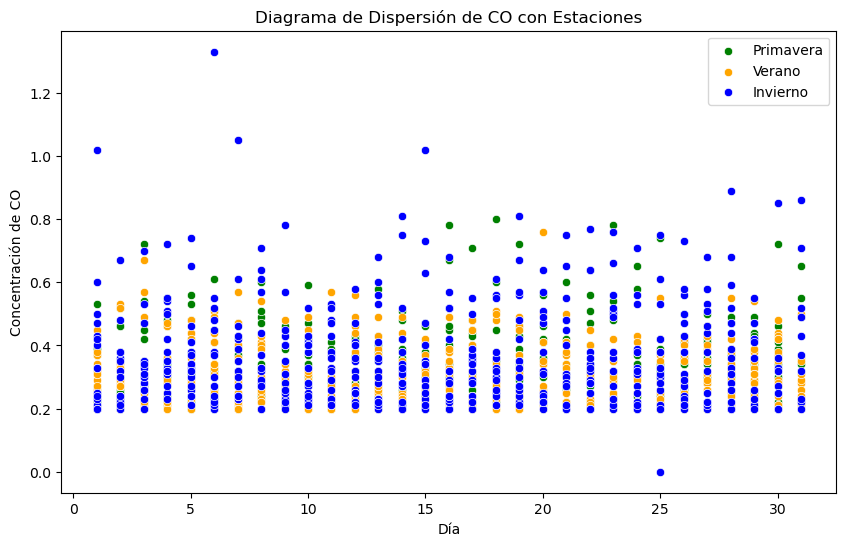

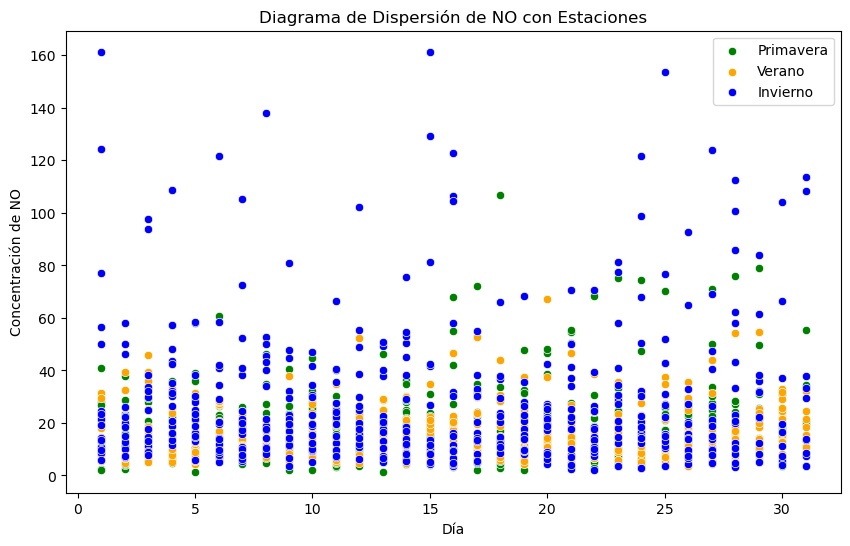

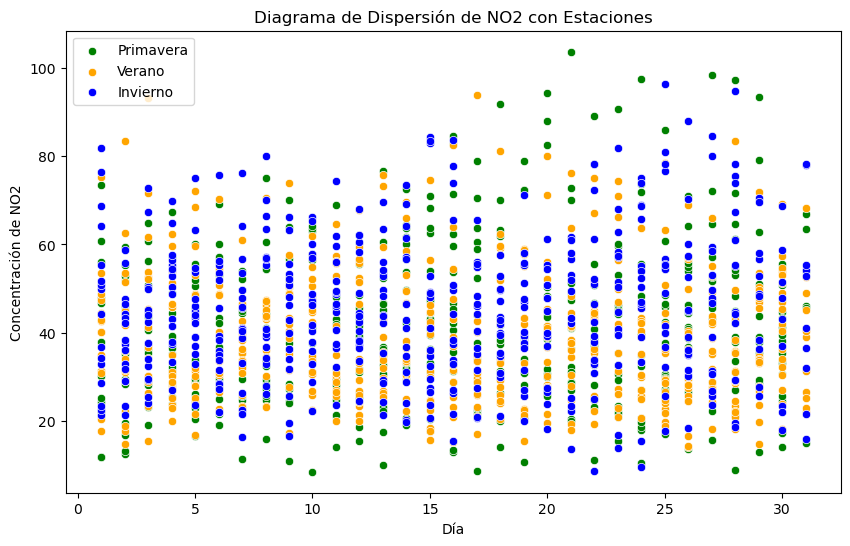

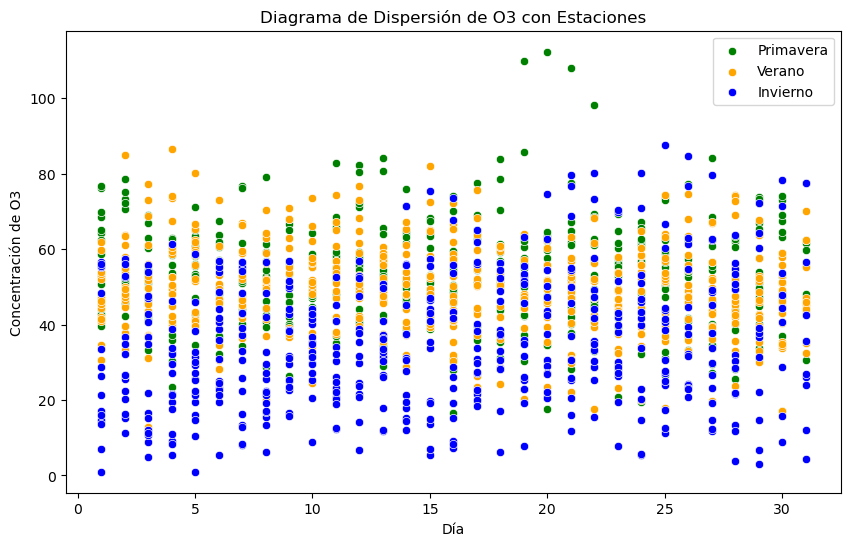

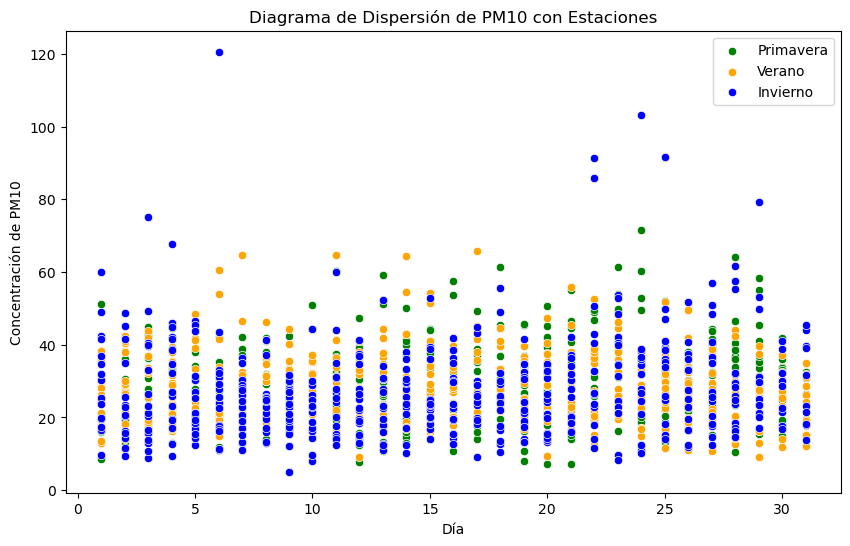

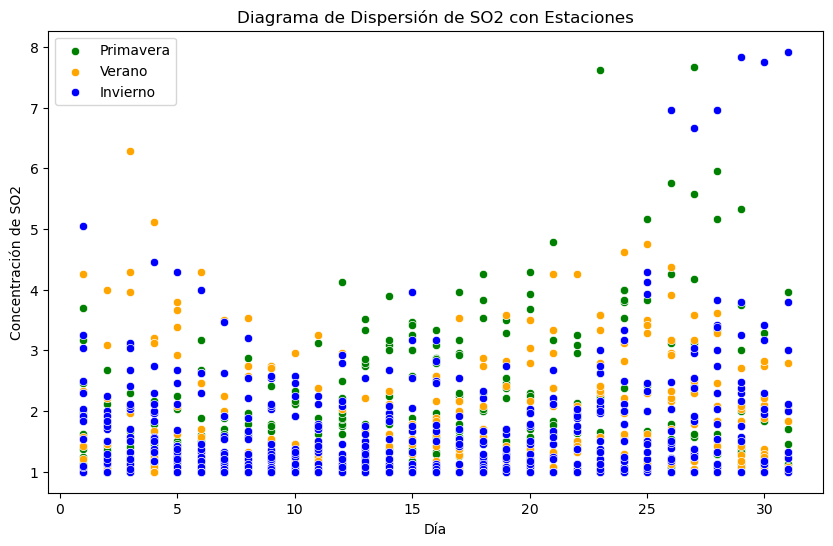

In [61]:
# Lista de contaminantes
contaminants = ['CO', 'NO', 'NO2', 'O3', 'PM10', 'SO2']

# Filtrar el DataFrame por estaciones de primavera, verano e invierno
spring_data = df[df['season'] == 'spring']
summer_data = df[df['season'] == 'summer']
winter_data = df[df['season'] == 'winter']

# Crear un diagrama de dispersión para cada contaminante
for contaminant in contaminants:
    plt.figure(figsize=(10, 6))
    
    # Diagrama de dispersión para la estación de primavera
    sns.scatterplot(x='day', y=contaminant, data=spring_data, label='Primavera', color='green')
    
    # Diagrama de dispersión para la estación de verano
    sns.scatterplot(x='day', y=contaminant, data=summer_data, label='Verano', color='orange')
    
    # Diagrama de dispersión para la estación de invierno
    sns.scatterplot(x='day', y=contaminant, data=winter_data, label='Invierno', color='blue')
    
    # Añadir etiquetas y título
    plt.xlabel('Día')
    plt.ylabel('Concentración de {}'.format(contaminant))
    plt.title('Diagrama de Dispersión de {} con Estaciones'.format(contaminant))
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()
